<a href="https://colab.research.google.com/github/AndreyDyachkov/Portfolio_RU/blob/main/06_yandex_afisha_business_metrics/7_yandex_afisha_business_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="5">Анализ бизнес-показателей</font>

<b>Задача:</b>
Помочь маркетологам снизить расходы: отказаться от невыгодных источников трафика и перераспределить бюджет.
<br>
<b>Описание данных: </b>
Данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
1. visits_log.csv - лог сервера с данными о посещениях сайта Яндекс.Афиши,
    - Uid — уникальный идентификатор пользователя,
    - Device — категория устройства пользователя,
    - Start Ts — дата и время начала сессии,
    - End Ts — дата и время окончания сессии,
    - Source Id — идентификатор источника перехода на сайт.
2. orders_log.csv - выгрузка всех заказов за этот период
    - Uid — уникальный идентификатор пользователя,
    - Buy Ts — дата и время заказа,
    - Revenue — сумма заказа.
3. costs.csv - статистика рекламных расходов.
    - source_id — идентификатор рекламного источника,
    - dt — дата проведения рекламной кампании,
    - costs — расходы на эту кампанию.

### Этап 1. Загружаем данные и готовим их для анализа

#### Загружаем библиотеки

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Загружаем датафреймы из csv файлов и проверяем как загрузилось

In [338]:
#from google.colab import drive
#drive.mount('/content/drive')

In [339]:
visits = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/visits_log.csv')
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [340]:
orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/orders_log.csv')
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [341]:
costs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/costs.csv')
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Загрузилось без видимых ошибок

#### Проверяем наличие дублей и пропусков. Обрабатываем пропуски и меняем тип данных при необходимости

In [342]:
visits.shape

(359400, 5)

In [343]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [344]:
visits.duplicated().sum()

0

In [345]:
orders.shape

(50415, 3)

In [346]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [347]:
orders.duplicated().sum()

0

In [348]:
costs.shape

(2542, 3)

In [349]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [350]:
costs.duplicated().sum()

0

<b>Итого получили:</b><br>
   Пропусков нет. Дублей нет. Все даты имеют тип string - поменяем на datetime 

In [351]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

#### Приводим названия колонок к единому стандарту

In [352]:
visits.columns = visits.columns.str.replace(' ', '_').str.lower()
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [353]:
orders.columns = orders.columns.str.replace(' ', '_').str.lower()
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

#### Проводим исследовательский анализ данных

##### Visits  

In [354]:
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [355]:
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

In [356]:
visits[['start_ts','end_ts']].describe(datetime_is_numeric=True)

,start_ts,end_ts
count,359400,359400
mean,2017-12-18 06:17:32.010528,2017-12-18 06:28:15.036228608
min,2017-06-01 00:01:00,2017-06-01 00:02:00
25%,2017-10-15 09:41:00,2017-10-15 09:45:45
50%,2017-12-18 18:46:00,2017-12-18 18:59:30
75%,2018-02-28 09:54:00,2018-02-28 10:08:15
max,2018-05-31 23:59:00,2018-06-01 01:26:00


<b>Visits:</b> всего две категории устройств пользователя; 9 источников перехода на сайт с большим разбросом по популярности, при этом 8 источника нет, а по 6 и 7 очень мало визитов; период по дате начала сессии: с июня 2017 по май 2018. При этом максимальная дата конца сессии попадаем на 1 июня 2018. 

Также проверим на предмет корректности дат: дата начала сессии должна быть <= даты окончания сессии  

In [357]:
visits[visits['start_ts'] > visits['end_ts']]

,device,end_ts,source_id,start_ts,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


Нашли всего две строчки - удалим

In [358]:
visits = visits[~(visits['start_ts'] > visits['end_ts'])]

##### Orders

In [359]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

Разброс большой, средняя выше медианы. Посмотрим на графиках

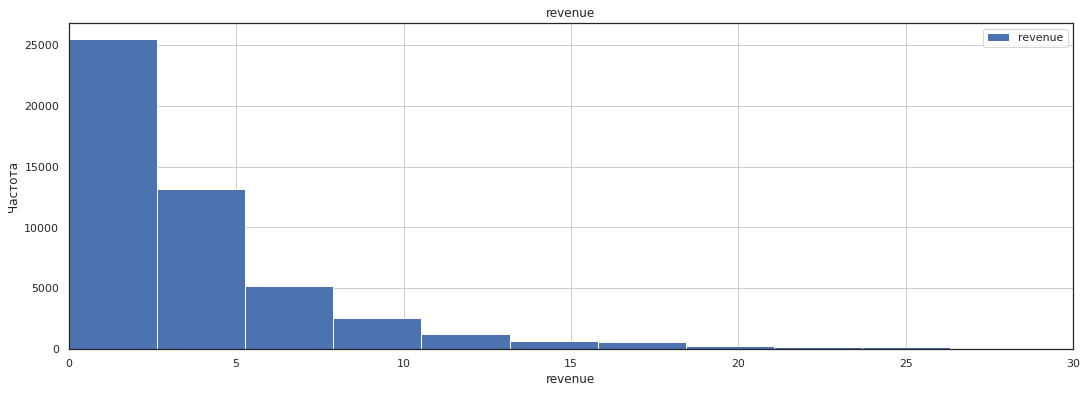

In [360]:
orders.plot(kind='hist', y='revenue', bins=1000, grid=True, figsize=(18,6), title='revenue', xlim=(0,30))
plt.xlabel('revenue')
plt.ylabel('Частота')
plt.show()

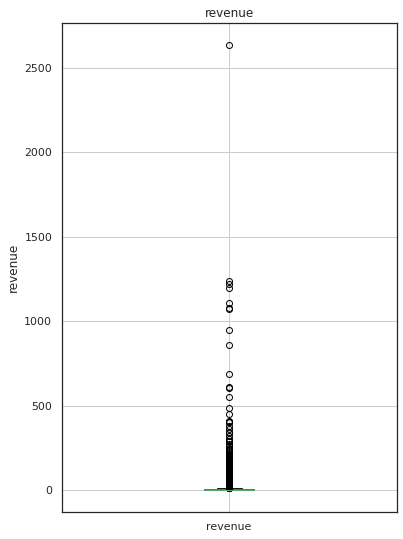

In [361]:
orders.plot(kind='box', y='revenue', grid=True, figsize=(6,9), title='revenue')
plt.ylabel('revenue')
plt.show()

In [362]:
orders['buy_ts'].describe(datetime_is_numeric=True)

count                            50415
mean     2017-12-20 05:14:24.846181632
min                2017-06-01 00:10:00
25%                2017-10-13 17:28:00
50%                2017-12-21 14:12:00
75%                2018-03-02 16:10:00
max                2018-06-01 00:02:00
Name: buy_ts, dtype: object

Огромный разброс по выручке (стандартное откл. значительно больше среднего, максимальное значение в 600 раз выше среднего). По boxplot видно что это выбросы - пока их оставляем. Период по дате заказа с 1.06.2017 по 1.06.2018 - эта дата за пределами отчетного периода - проверим.

Проверим сколько продаж за пределами отчетного периода

In [363]:
orders[orders['buy_ts']>='2018-06-01']

,buy_ts,revenue,uid
50414,2018-06-01 00:02:00,3.42,83872787173869366


Одна продажа в июне 2018. Продажи в июне 2018 нам не нужны. Удаляем чтобы не искажались средние по месяцу

In [364]:
orders = orders[orders['buy_ts']<'2018-06-01']

##### Costs

In [365]:
costs['source_id'].value_counts().sort_index()

1     363
2     363
3     363
4     363
5     364
9     363
10    363
Name: source_id, dtype: int64

In [366]:
costs['dt'].describe(datetime_is_numeric=True)

count                             2542
mean     2017-11-29 09:04:57.403645952
min                2017-06-01 00:00:00
25%                2017-08-30 00:00:00
50%                2017-11-29 00:00:00
75%                2018-02-28 00:00:00
max                2018-05-31 00:00:00
Name: dt, dtype: object

In [367]:
costs['costs'].describe()

count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64

Разброс costs большой, средняя выше медианы. Посмотрим на распределение по costs

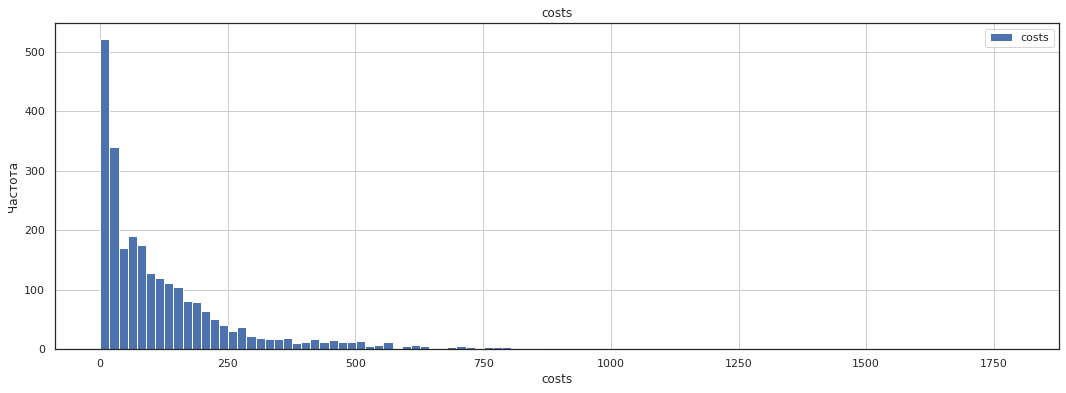

In [368]:
costs.plot(kind='hist', y='costs', bins=100, grid=True, figsize=(18,6), title='costs')
plt.xlabel('costs')
plt.ylabel('Частота')
plt.show()

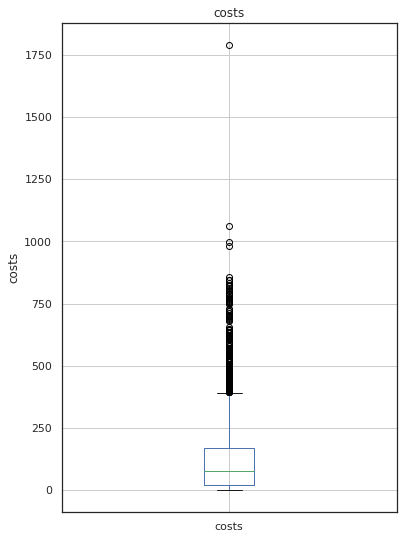

In [369]:
costs.plot(kind='box', y='costs', grid=True, figsize=(6,9), title='costs')
plt.ylabel('costs')
plt.show()

Распределение не нормальное, есть выбросы - пока выбросы оставляем

### Этап 2. Рассчитываем метрики и строим графики

#### Продуктовые метрики

##### Рассчитываем DAU, WAU и MAU.

Выделим в отдельные столбцы год, месяц и неделю, а также дату. Все по дате начала сессии.

In [370]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
visits.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


Считаем средний DAU за весь отчетный период

In [371]:
dau = visits.groupby('session_date')['uid'].nunique()
dau_total = int(dau.mean())
dau_total

907

Средний WAU за весь отчетный период

In [372]:
wau = visits.groupby(['session_year', 'session_week'])['uid'].nunique()
wau_total = int(wau.mean())
wau_total

5716

Средний MAU за весь отчетный период

In [373]:
mau = visits.groupby(['session_year', 'session_month'])['uid'].nunique()
mau_total = int(mau.mean())
mau_total

23228

Изменение DAU по дням на графике

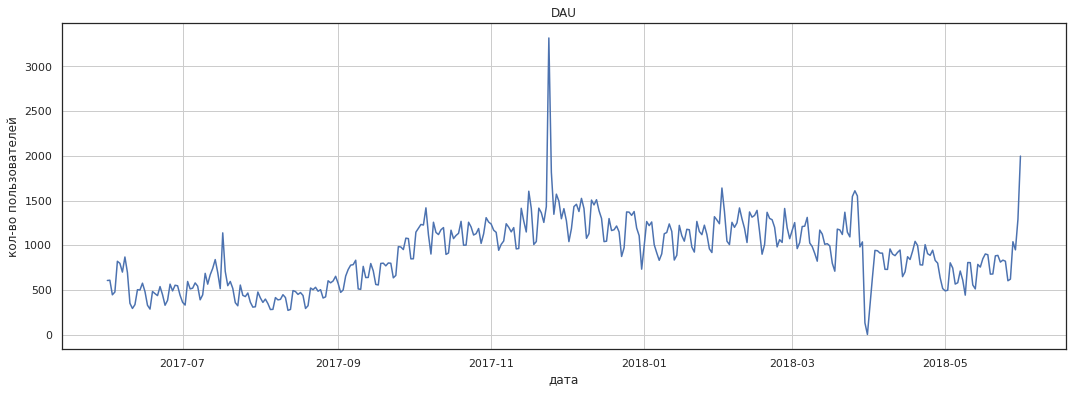

In [374]:
dau.plot(grid=True, figsize=(18,6))
plt.title('DAU')
plt.xlabel('дата')
plt.ylabel('кол-во пользователей')
plt.show()

Посмотрим на выбросы которые видны на графике (выше примерно 1700 и около 0) 

In [375]:
dau[dau>1700]

session_date
2017-11-24    3319
2017-11-25    1817
2018-05-31    1997
Name: uid, dtype: int64

In [376]:
dau[dau<100]

session_date
2018-03-31    1
Name: uid, dtype: int64

Видим аномально высокое число визитов два дня подряд 24-25.11.2017 и в самом конце периода (31.05.2018). Возможные причины: Яндекс Афиша что-то сделала для привлечения пользователей; внешняя причина: случилось событие которое как-то привело пользователей на страницу; ошибка в данных. Самый простой вариант выяснить: спросить у маркетологов Яндекс Афиша. Аномальное падение 31.03.2018 возможно из-за внутренней технической ошибки или внешних причин ограничивающих доступ к сайту. Можно уточнить у коллег.

Изменение WAU по неделям на графике

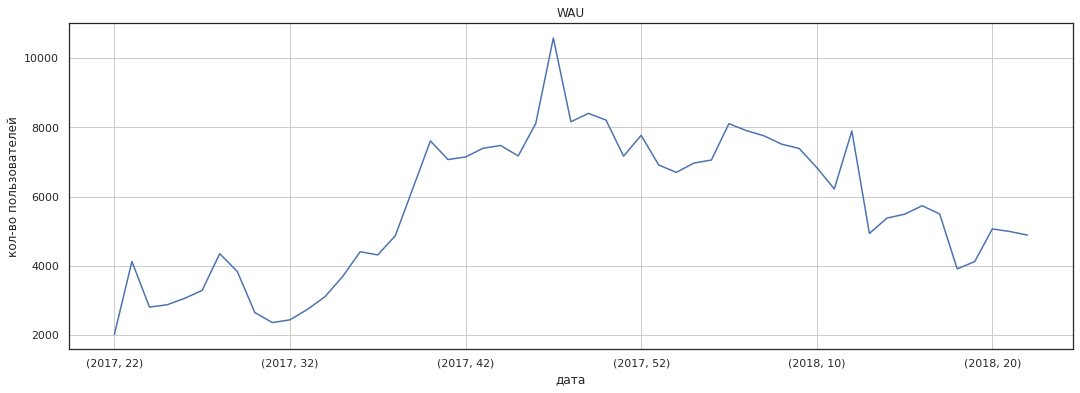

In [377]:
wau.plot(grid=True, figsize=(18,6))
plt.title('WAU')
plt.xlabel('дата')
plt.ylabel('кол-во пользователей')
plt.show()

Видим рост WAU с середины года до конца года, который сменяется плавным падением в первой половине следующего года. Причины: возможна сезонность (нужны данные за несколько лет чтобы это подтвердить) или изменение активности маркетологов в течение этого периода или внешние факторы: интерес пользователей к контенту сайта. Как выяснить: спросить у маркетологов Яндекс Афиша

Изменение MAU по месяцам на графике

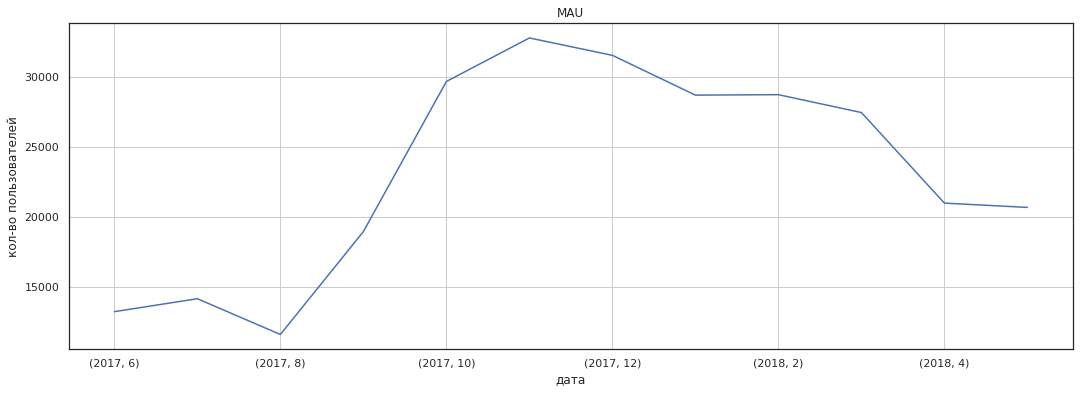

In [378]:
mau.plot(grid=True, figsize=(18,6))
plt.title('MAU')
plt.xlabel('дата')
plt.ylabel('кол-во пользователей')
plt.show()

В целом тенденции такие же как и динамике WAU: рост с середины года до конца года, который сменяется плавным падением в первой половине следующего года. Возможные причины те же: сезонность (нужны данные за несколько лет чтобы это подтвердить) или изменение активности маркетологов в течение этого периода или внешние факторы: интерес пользователей к контенту сайта (например летом все в отпусках и не интересуются афишей). Как выяснить: спросить у маркетологов Яндекс Афиша

<b>Вывод по DAU, WAU, MAU</b><br>
1. Были очевидные тренды: рост недельного и месячного кол-ва уникальных пользователей с начала осени до декабря 2017. В декабре 2017 началось плавное снижение до конца отчетного периода. В целом сравнив конец с началом периода можно предположить что число  уникальных пользователей имеет тенденцию к росту.
2. Возможные причины такого тренда: сезонность (для подтверждения нужны данные за несколько лет); активность маркетологов; внешние факторы (изменение интереса пользователей к контенту сайта с течением времени)
3. Выявлены аномально высокие и низкие показатели DAU. Возможные причины: активность Яндекс Афишы; внешнее событие; ошибка в данных. Аномальное падение возможно из-за внутренней технической ошибки или внешних причин ограничивающих доступ к сайту.

##### Определяем сколько раз за день пользователи в среднем заходят на сайт. Стройм график, отражающий изменения метрики во времени;

Сгруппируем visits по session_date который расчитали в предыдущем задании. Поделим число визитов на число уникальных пользователей и получим среднее число визитов на одного пользователя для каждого дня. Усредним этот показатель и получим среднее число визитов за отчетный период

In [379]:
sessions_per_user_per_day = visits.groupby('session_date').agg({'uid':['count','nunique']})
sessions_per_user_per_day.columns = ['n_sessions','n_users']
sessions_per_user_per_day['sessions_per_user'] = sessions_per_user_per_day['n_sessions'] / sessions_per_user_per_day['n_users']
sessions_per_user_per_day['sessions_per_user'].mean()

1.0821660876897365

Или второй вариант определение среднего: сумма визитов за день делим на сумму уникальных пользователей за день

In [380]:
sessions_per_user_per_day['n_sessions'].sum() / sessions_per_user_per_day['n_users'].sum()

1.0874076046340644

Выведем график с изменением метрики по дням

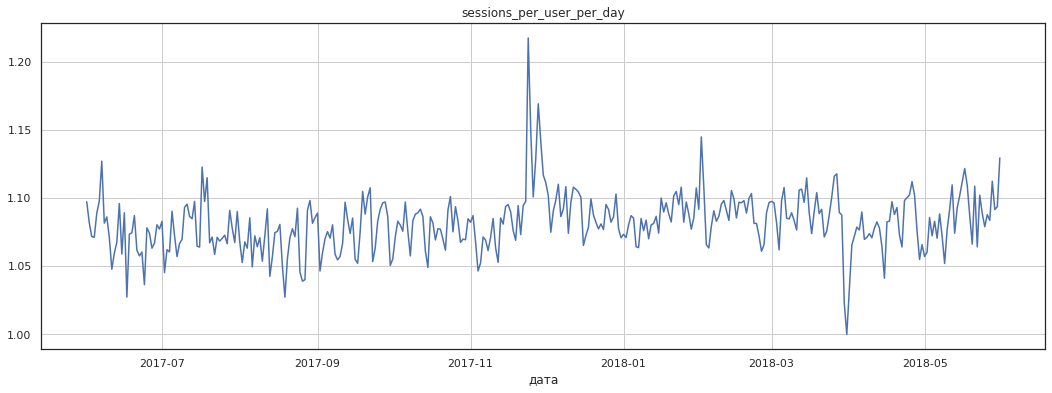

In [381]:
sessions_per_user_per_day['sessions_per_user'].plot(grid=True, figsize=(18,6))
plt.title('sessions_per_user_per_day')
plt.xlabel('дата')
plt.ylabel('')
plt.show()

Посмотрим на выбросы которые видны на графике (выше примерно 1.15 и около 1) 

In [382]:
sessions_per_user_per_day[sessions_per_user_per_day['sessions_per_user']>1.15]

,n_sessions,n_users,sessions_per_user
session_date,,,
2017-11-24,4042,3319,1.217837
2017-11-28,1746,1493,1.169457


In [383]:
sessions_per_user_per_day[sessions_per_user_per_day['sessions_per_user']<1.01]

,n_sessions,n_users,sessions_per_user
session_date,,,
2018-03-31,1,1,1.0


<b>Вывод по среднему числу посещений на одного пользователя в день</b><br>
1. Среднее число посещение: 1.1
2. Выявлено аномально высокое число посещений на одного пользователя 24 и 28 ноября 2017 (24 также было высокое DAU) и аномально низкая активность 31.03.2018, что совпадает с минимальным DAU. Причины очевидно такие же как и для выбросов в DAU: Яндекс Афиша что-то сделала для привлечения пользователей включая повторные визиты; внешняя причина: случилось событие которое как-то привело пользователей на страницу; ошибка в данных. Аномальное падение 31.03.2018 возможно из-за внутренней технической ошибки или внешних причин ограничивающих доступ к сайту.

##### Исследуем сколько времени пользователи проводят на сайте. Узнаем продолжительность типичной пользовательской сессии за весь период. (Чтобы выбрать подходящую среднюю меру, построим график распределения)

Определим продолжительность каждой сессии

In [384]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


Посмотрим на распределение (шкалу x ограничим для лучшей визуализации)

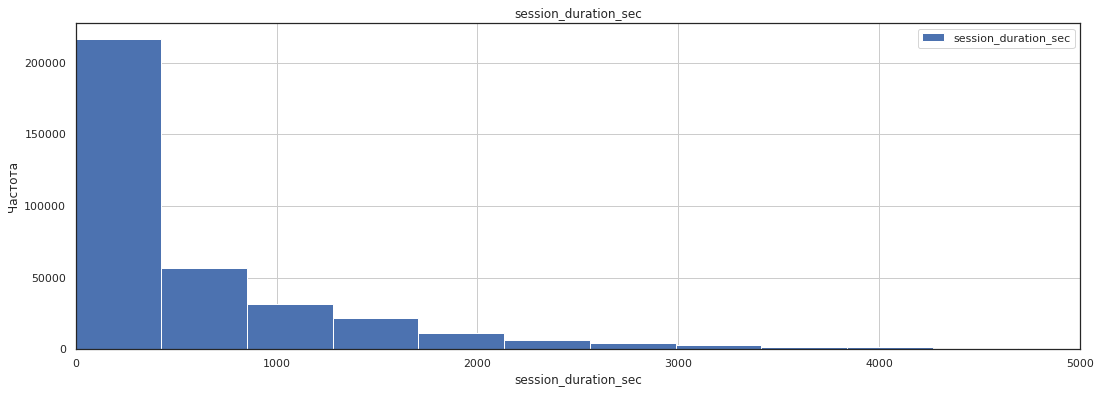

In [385]:
visits.plot(kind='hist', y='session_duration_sec', bins=100, grid=True, figsize=(18,6), title='session_duration_sec', xlim=(0,5000))
plt.xlabel('session_duration_sec')
plt.ylabel('Частота')
plt.show()

In [386]:
visits['session_duration_sec'].describe()

count    359398.000000
mean        643.042287
std         997.105212
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration_sec, dtype: float64

В соответствии с условиями задания выбираем моду. Хотя можно и медиану.

In [387]:
visits['session_duration_sec'].mode() 

0    60
dtype: int64

<b>Вывод по продолжительности типичной пользовательской сессии</b><br>
Распределение продолжительности сессии ненормальное. Определили моду 60 секунд.

##### Рассчитываем Retention Rate, применяя когортный анализ. Показываем изменения метрики во времени на графике. Находим средний Retention Rate на второй месяц «жизни» когорт.

Retention rate определим по месяцам

Найдем первую дату покупки для каждого пользвателя

In [388]:
first_order_date_by_user = orders.groupby('uid')['buy_ts'].min()
first_order_date_by_user.name = 'first_order_date'
first_order_date_by_user.head()

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: first_order_date, dtype: datetime64[ns]

Найденную дату присоединим обратно в таблицу с заказами

In [389]:
orders = orders.join(first_order_date_by_user, on='uid')
orders.head() 

,buy_ts,revenue,uid,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


В таблицу заказов добавим колонки с первым месяцем заказа и месяцем заказа  

In [390]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders.head()

,buy_ts,revenue,uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


Расcчитаем lifetime (в месяцах) соответствующий каждому заказу (дата заказа - дата первого заказа)

In [391]:
orders['cohort_lifetime'] = (orders['order_month'] - orders['first_order_month']) / np.timedelta64(1, 'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')
orders.head()

,buy_ts,revenue,uid,first_order_date,first_order_month,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0


Создадим когорты: сделаем свод по месяцу покупки и lifetime

In [392]:
cohorts = orders.groupby(['first_order_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts.head()

,first_order_month,cohort_lifetime,uid
0,2017-06-01,0,2023
1,2017-06-01,1,61
2,2017-06-01,2,50
3,2017-06-01,3,54
4,2017-06-01,4,88


Определим исходное число пользователей в когортах (пользователи сделавшие заказ в lifetime 0)

In [393]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_order_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
initial_users_count.head()

,first_order_month,cohort_users
0,2017-06-01,2023
12,2017-07-01,1923
23,2017-08-01,1370
33,2017-09-01,2581
42,2017-10-01,4340


Добавим  это исходное число пользователей обратно в cohorts

In [394]:
cohorts = cohorts.merge(initial_users_count,on='first_order_month')
cohorts.head()

,first_order_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,2023,2023
1,2017-06-01,1,61,2023
2,2017-06-01,2,50,2023
3,2017-06-01,3,54,2023
4,2017-06-01,4,88,2023


Рассчитаем retention rate

In [395]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
cohorts

,first_order_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,2023,2023,1.000000
1,2017-06-01,1,61,2023,0.030153
2,2017-06-01,2,50,2023,0.024716
3,2017-06-01,3,54,2023,0.026693
4,2017-06-01,4,88,2023,0.043500
...,...,...,...,...,...
73,2018-03-01,1,90,3533,0.025474
74,2018-03-01,2,58,3533,0.016417
75,2018-04-01,0,2276,2276,1.000000
76,2018-04-01,1,69,2276,0.030316


Оптимизируем вид таблицы, lifetime перенесем в колонки

In [396]:
retention_pivot = cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.0,0.030153,0.024716,0.026693,0.043500,0.033119,0.030648,0.023233,0.028670,0.022244,0.022244,0.026199
2017-07-01,1.0,0.027041,0.029641,0.033281,0.025481,0.019761,0.018721,0.020281,0.021841,0.011440,0.013521,NaN
2017-08-01,1.0,0.042336,0.038686,0.032117,0.029197,0.023358,0.021898,0.032117,0.013869,0.022628,NaN,NaN
2017-09-01,1.0,0.050368,0.038745,0.028671,0.020147,0.024797,0.025571,0.014336,0.016660,NaN,NaN,NaN
2017-10-01,1.0,0.047465,0.028341,0.021198,0.021429,0.016590,0.012903,0.015438,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.054398,0.029405,0.025974,0.019848,0.011762,0.015192,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.033311,0.023500,0.022131,0.011408,0.014374,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.033798,0.024607,0.012748,0.013341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.032320,0.015886,0.010682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Визализируем, создадим тепловую карту

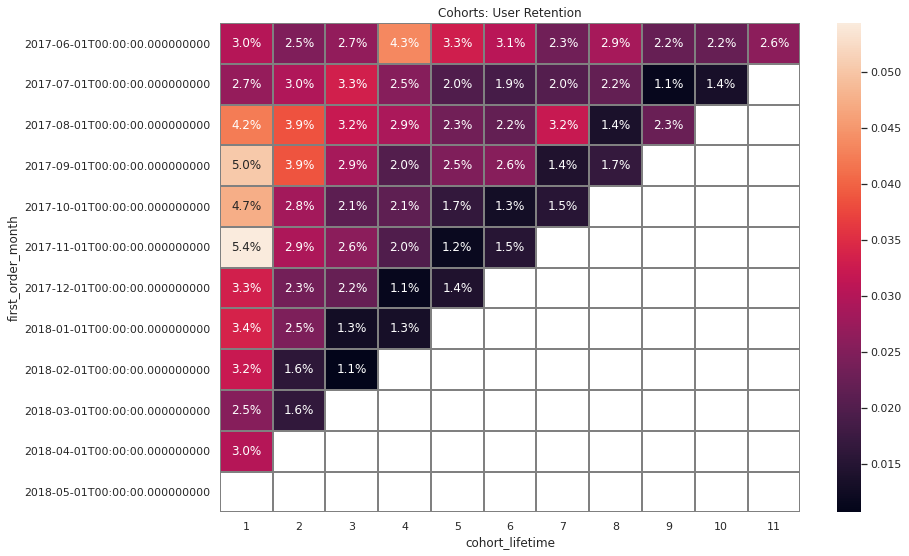

In [397]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot.loc[:, retention_pivot.columns != 0], annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 

Найдем средний Retention Rate на второй месяц «жизни» когорт.

In [398]:
cohorts[cohorts['cohort_lifetime']==2]['retention'].mean()

0.02699430920720346

Или так

In [399]:
cohorts[cohorts['cohort_lifetime']==2]['uid'].sum() / cohorts[cohorts['cohort_lifetime']==2]['cohort_users'].sum()

0.02575340712777529

<b>Вывод Retention rate</b><br>
Retention rate низкий (хотя тут нужно сравнивать с аналогичными продуктами - может это и нормально) и в целом имеет тенденцию к  снижению с ростом времени жизни когорты (что в принципе нормально)

#### Метрики электронной коммерции

##### Исследуем сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки.

Найдем дату первого визита для каждого uid

In [400]:
first_visit_date_by_user = visits.groupby('uid')['start_ts'].min()
first_visit_date_by_user.name = 'first_visit_date'
first_visit_date_by_user = first_visit_date_by_user.reset_index()
first_visit_date_by_user.head()

,uid,first_visit_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


Дату первого заказа для каждого uid считали ранее при расчете Retention rate

In [401]:
first_order_date_by_user =  first_order_date_by_user.reset_index()
first_order_date_by_user.head()

,uid,first_order_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


Соединим даты первого визита и первого заказа в одну таблицу (merge по умолчанию делает inner join так что в табл попадут только uid с заказами) 

In [402]:
first_visit_first_order = pd.merge(first_order_date_by_user, first_visit_date_by_user)
first_visit_first_order.head()

,uid,first_order_date,first_visit_date
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


Добавим колонку с разницой дат и определим среднюю

In [403]:
first_visit_first_order['time_to_order'] = first_visit_first_order['first_order_date'] - first_visit_first_order['first_visit_date']
first_visit_first_order.head()

,uid,first_order_date,first_visit_date,time_to_order
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,106 days 23:02:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0 days 01:19:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,0 days 19:44:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00


In [404]:
first_visit_first_order['time_to_order'].mean()

Timedelta('16 days 21:40:50.532281971')

Переведем в дни и посмотрим на распределение

In [405]:
first_visit_first_order['days_to_order'] = first_visit_first_order['time_to_order'] / np.timedelta64(1, 'D')
first_visit_first_order['days_to_order'].describe()

count    36522.000000
mean        16.903363
std         47.073322
min          0.000000
25%          0.002778
50%          0.011111
75%          2.012153
max        363.294444
Name: days_to_order, dtype: float64

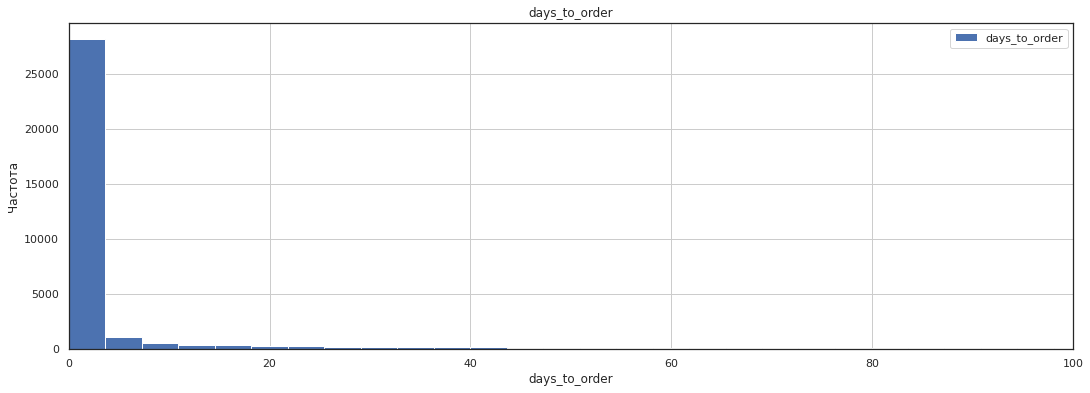

In [406]:
first_visit_first_order.plot(kind='hist', y='days_to_order', bins=100, grid=True, figsize=(18,6), title='days_to_order', xlim=(0,100))
plt.xlabel('days_to_order')
plt.ylabel('Частота')
plt.show()

<b>Вывод по среднему времени между первым посещением сайта и первой покупкой</b><br>
Среднее время 16 дней, однако распределение не нормальное. Минимум 50% процентов заказов (медиана) совершается в день первого посещения - что странно учитывая специфику сайта. Второй вопрос: данные по заказам у нас за тот же период что и по визитам, т.е. заказы совершенные после отчетного периода пользователями у которых первое посещение было в отчетном периоде - в выгрузку не попали - т.е показатель занижен.

##### Применяя когортный анализ рассчитаем среднее количество покупок на одного покупателя за 6 месяцев.

Создадим когорты и запишем в них кол-во уникальных пользователей и кол-во заказов

In [407]:
cohorts_n_orders = orders.groupby(['first_order_month','cohort_lifetime']).agg({'uid':['nunique','count']}).reset_index()
cohorts_n_orders.columns = ['first_order_month','cohort_lifetime', 'n_users', 'n_orders']
cohorts_n_orders.head()

,first_order_month,cohort_lifetime,n_users,n_orders
0,2017-06-01,0,2023,2354
1,2017-06-01,1,61,177
2,2017-06-01,2,50,174
3,2017-06-01,3,54,226
4,2017-06-01,4,88,292


Считаем за 6 месяцев поэтому нам не нужны когорты с lifetime 5 и менее. Исключим даты первого заказа которые относятся к 2018.

In [408]:
cohorts_n_orders = cohorts_n_orders[(cohorts_n_orders['first_order_month']<'2018-01-01')&(cohorts_n_orders['cohort_lifetime']<6)]
cohorts_n_orders.head()

,first_order_month,cohort_lifetime,n_users,n_orders
0,2017-06-01,0,2023,2354
1,2017-06-01,1,61,177
2,2017-06-01,2,50,174
3,2017-06-01,3,54,226
4,2017-06-01,4,88,292


Среднее количество покупок на одного покупателя за 6 месяцев по покупателям у которых с момента первой покупки прошло 6 месяцев

In [409]:
cohorts_n_orders['n_orders'].sum() / cohorts_n_orders['n_users'].sum()

1.2404670912951168

<b>Вывод по среднему количество покупок на одного покупателя за 6 месяцев</b><br>
Среднее 1.24

##### Рассчитаем средний чек, применяя группировку по времени совершения покупки.

Считаем средний чек заказа (Average Order Value) за весь период

In [410]:
aol = orders['revenue'].sum() / orders['uid'].count()
aol

4.9996782639742925

Построим график по месяцам

In [411]:
aol_per_month = orders.groupby(['order_month']).agg({'revenue':'sum','uid':'count'})
aol_per_month['aol_per_month'] = aol_per_month['revenue'] / aol_per_month['uid']
aol_per_month

,revenue,uid,aol_per_month
order_month,,,
2017-06-01,9557.49,2354,4.060106
2017-07-01,12539.47,2363,5.306589
2017-08-01,8758.78,1807,4.847139
2017-09-01,18345.51,3387,5.416448
2017-10-01,27987.70,5679,4.928280
2017-11-01,27069.93,5659,4.783518
2017-12-01,36388.60,6218,5.852139
2018-01-01,19417.13,4721,4.112927
2018-02-01,25560.54,5281,4.840095


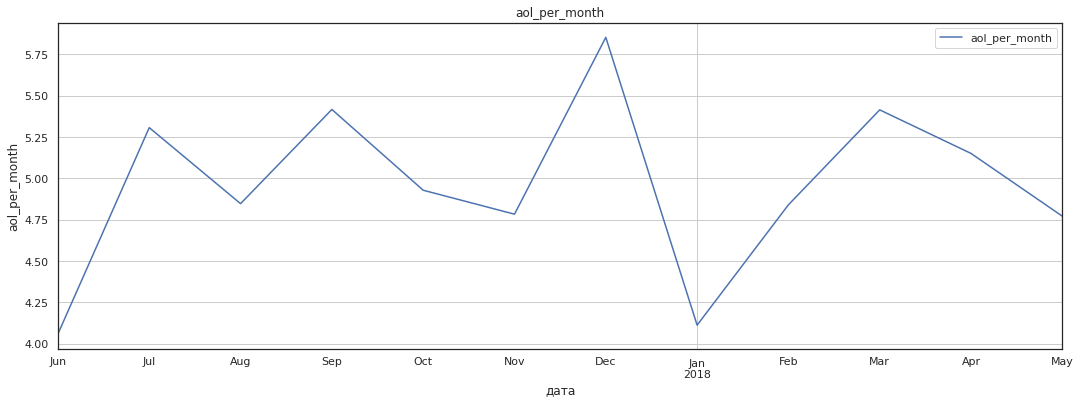

In [412]:
aol_per_month.plot(y='aol_per_month', grid=True, figsize=(18,6))
plt.title('aol_per_month')
plt.xlabel('дата')
plt.ylabel('aol_per_month')
plt.show()

<b>Вывод по среднему чеку</b><br>
Средний чек за весь период равен 5. При оценке по месяцам видны колебания с минимальными значениями в июне 2017 и январе 2018. Максимальный средний чек был в декабре 2017. Возможно в периоды с минимальным значеним действовали скидки поэтому дополнительно посмотрим на кол-во покупок в эти месяцы.

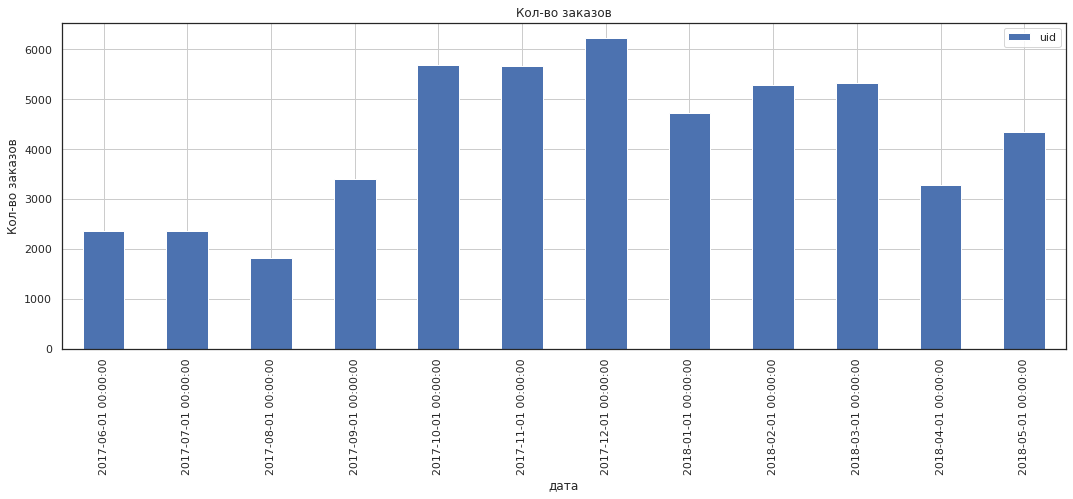

In [413]:
aol_per_month.plot(kind='bar',y='uid', grid=True, figsize=(18,6))
plt.title('Кол-во заказов')
plt.xlabel('дата')
plt.ylabel('Кол-во заказов')
plt.show()

Если скидки и были, то на число заказов они подействовали.

##### Выясняем, как меняется LTV на покупателя по когортам. Рассчитаем средний LTV по когортам за 6 месяцев; в расчёт включаем когорты, «прожившие» не менее 6 месяцев.

Сформируем когорты и сразу исключим когорты с lifetime меньше 5 по дате первого заказа 

In [414]:
cohorts_for_ltv = (
    orders[orders['first_order_month'] < '2018-01-01'].groupby(['first_order_month', 'cohort_lifetime'])
    .agg({'revenue': 'sum'})
    .reset_index()
    )
cohorts_for_ltv.head()

,first_order_month,cohort_lifetime,revenue
0,2017-06-01,0,9557.49
1,2017-06-01,1,981.82
2,2017-06-01,2,885.34
3,2017-06-01,3,1931.30
4,2017-06-01,4,2068.58


Добавим кол-во пользователей в каждой когорте (кол-во пользователей с lifetime 0, считали ранее в retention rate)

In [415]:
cohorts_for_ltv = cohorts_for_ltv.merge(initial_users_count,on='first_order_month')
cohorts_for_ltv.head()

,first_order_month,cohort_lifetime,revenue,cohort_users
0,2017-06-01,0,9557.49,2023
1,2017-06-01,1,981.82,2023
2,2017-06-01,2,885.34,2023
3,2017-06-01,3,1931.30,2023
4,2017-06-01,4,2068.58,2023


Определим валовую прибыль, умножив выручку на маржинальность ,которая по условию 100%

In [416]:
margin_rate = 1

cohorts_for_ltv['gp'] = cohorts_for_ltv['revenue'] * margin_rate
cohorts_for_ltv.head()

,first_order_month,cohort_lifetime,revenue,cohort_users,gp
0,2017-06-01,0,9557.49,2023,9557.49
1,2017-06-01,1,981.82,2023,981.82
2,2017-06-01,2,885.34,2023,885.34
3,2017-06-01,3,1931.30,2023,1931.30
4,2017-06-01,4,2068.58,2023,2068.58


Найдём LTV и представим в виде сводной  и накопительным итогом

In [417]:
cohorts_for_ltv['ltv'] = cohorts_for_ltv['gp'] / cohorts_for_ltv['cohort_users']
cohorts_for_ltv.head()

,first_order_month,cohort_lifetime,revenue,cohort_users,gp,ltv
0,2017-06-01,0,9557.49,2023,9557.49,4.724414
1,2017-06-01,1,981.82,2023,981.82,0.485329
2,2017-06-01,2,885.34,2023,885.34,0.437637
3,2017-06-01,3,1931.30,2023,1931.30,0.954671
4,2017-06-01,4,2068.58,2023,2068.58,1.022531


In [418]:
output = cohorts_for_ltv.pivot_table(
    index='first_order_month', columns='cohort_lifetime', values='ltv', aggfunc='mean'
).round(2)
output.cumsum(axis=1)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.40,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37,7.58,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.93,7.00,7.31,7.65,NaN,NaN,NaN,NaN,NaN,NaN


Выведем также и без накопительного итога чтобы понять прирост LTV по месяцам 

In [419]:
output

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,NaN
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,NaN,NaN
2017-09-01,5.64,1.12,0.52,3.98,0.40,0.65,0.70,0.24,0.18,NaN,NaN,NaN
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,NaN,NaN,NaN,NaN
2017-11-01,5.15,0.40,0.20,0.32,0.15,0.05,0.11,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,NaN,NaN,NaN,NaN,NaN,NaN


Рассчитаем средний LTV по когортам за 6 месяцев

In [420]:
ltv_6m = output.cumsum(axis=1)[5]
ltv_6m

first_order_month
2017-06-01     8.36
2017-07-01     7.67
2017-08-01     7.37
2017-09-01    12.31
2017-10-01     6.16
2017-11-01     6.27
2017-12-01     7.65
Name: 5, dtype: float64

In [421]:
ltv_6m.mean()

7.970000000000001

Визуализируем LTV по когортам

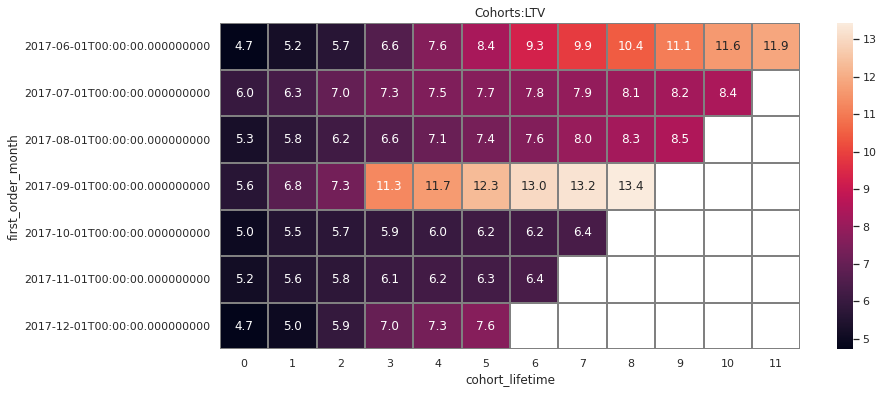

In [422]:
sns.set(style='white')
plt.figure(figsize=(13, 6))
plt.title('Cohorts:LTV')
sns.heatmap(output.cumsum(axis=1), annot=True, fmt='.1f', linewidths=1, linecolor='gray'); 

<b>Вывод по LTV</b><br>
Средний LTV за 6 месяцев по когортам с lifetime не моложе 5 месяцев 7.97. При оценке по месяцам видно что основную ценность клиент создает в первый месяц, а в дальнейшие месяцы прирост LTV небольшой. При этом разные когорты немного отличаются по LTV. Выделяется когорта начавшаяся в сентябре 2017: максимальное LTV за 6 мес за счет большого прироста в декабре 2017.

#### Маркетинговые метрики

##### Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени;

Сумма расходов на маркетинг

In [423]:
costs['costs'].sum()

329131.62

Распределение по источникам

In [424]:
costs.groupby('source_id')['costs'].sum()

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

Выделим недели, месяцы, годы

In [425]:
costs['cost_year']  = costs['dt'].dt.year
costs['cost_month'] = costs['dt'].dt.month
costs['cost_week']  = costs['dt'].dt.week
costs.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,source_id,dt,costs,cost_year,cost_month,cost_week
0,1,2017-06-01,75.20,2017,6,22
1,1,2017-06-02,62.25,2017,6,22
2,1,2017-06-03,36.53,2017,6,22
3,1,2017-06-04,55.00,2017,6,22
4,1,2017-06-05,57.08,2017,6,23


Построим график

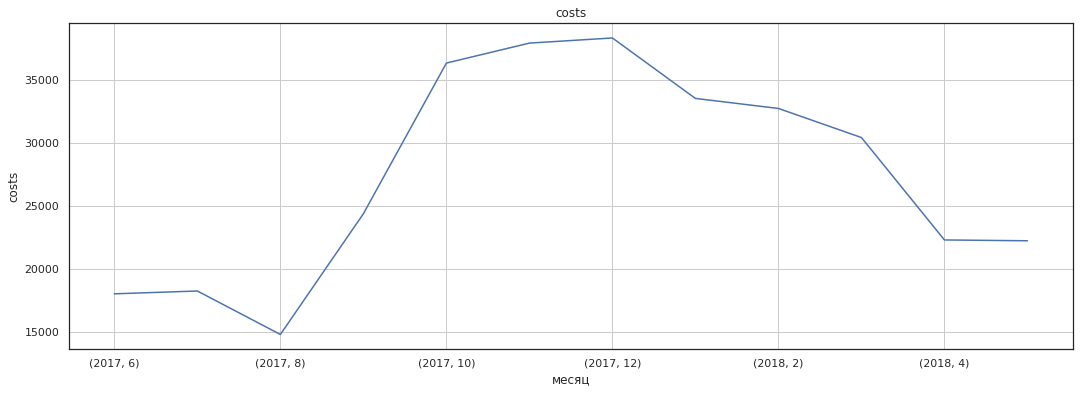

In [426]:
costs.groupby(['cost_year', 'cost_month'])['costs'].sum().plot(grid=True, figsize=(18,6))
plt.title('costs')
plt.xlabel('месяц')
plt.ylabel('costs')
plt.show()

График напоминает график MAU. Посмотрим на одном графике

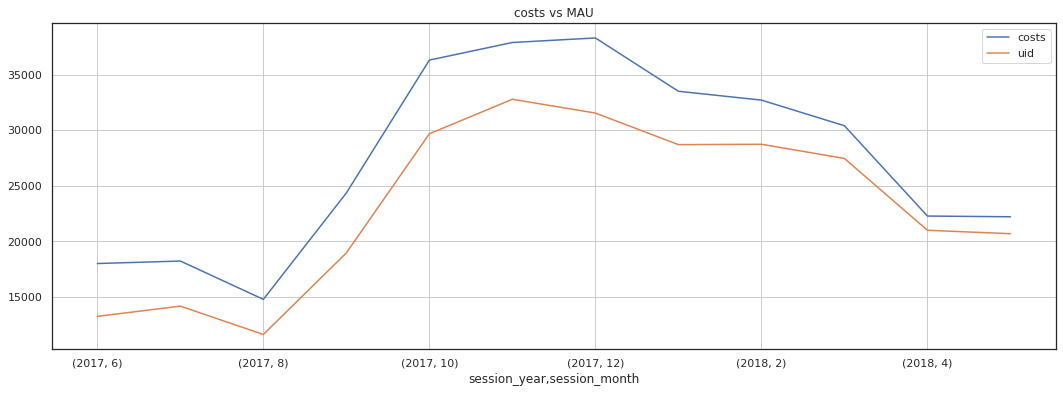

In [427]:
costs.groupby(['cost_year', 'cost_month'])['costs'].sum().plot(grid=True, figsize=(18,6), legend=True)
mau.plot(grid=True, figsize=(18,6), legend=True)
plt.title('costs vs MAU')
plt.show()

График в разбивке по источнику трафика

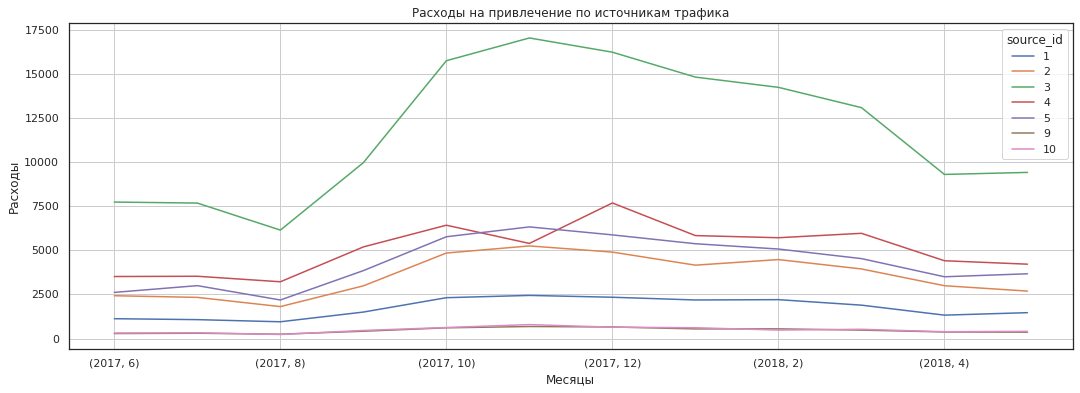

In [428]:
costs.pivot_table(index=['cost_year', 'cost_month'], columns='source_id',values="costs",aggfunc='sum').plot(grid=True, figsize=(18, 6))
plt.title('Расходы на привлечение по источникам трафика')
plt.xlabel('Месяцы')
plt.ylabel('Расходы')
plt.show()

In [429]:
costs.pivot_table(index=['cost_year', 'cost_month'], columns='source_id',values="costs",aggfunc='sum')

source_id                  1        2         3   ...       5       9       10
cost_year cost_month                              ...                         
2017      6           1125.61  2427.38   7731.65  ...  2616.12  285.22  314.22
          7           1072.88  2333.11   7674.37  ...  2998.14  302.54  329.82
          8            951.81  1811.05   6143.54  ...  2185.28  248.93  232.57
          9           1502.01  2985.66   9963.55  ...  3849.14  415.62  460.67
          10          2315.75  4845.00  15737.24  ...  5767.40  609.41  627.24
          11          2445.16  5247.68  17025.34  ...  6325.34  683.18  792.36
          12          2341.20  4897.80  16219.52  ...  5872.52  657.98  645.86
2018      1           2186.18  4157.74  14808.78  ...  5371.52  547.16  614.35
          2           2204.48  4474.34  14228.56  ...  5071.31  551.50  480.88
          3           1893.09  3943.14  13080.85  ...  4529.62  480.29  526.41
          4           1327.49  2993.70   9296.81  ...  3501.15  373.49  388.25
          5           1467.61  2689.44   9411.42  ...  3669.56  362.17  409.86

[12 rows x 7 columns]

<b>Вывод по расходам на маркетинг</b><br>
Всего за период потратили 329 тысяч. Месячные траты росли во второй половине 2017 года и снижались в первой половине 2018. Вероятно это имело прямое влияние на MAU - графики практически совпадают. В разбивке по источникам трафика видно что больше всего тратили на источник 3 и именно его изменение определяет общую динамику расходов.

##### Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отражаем изменения метрик на графиках;

Средний CAC на одного покупателя за весь период

In [430]:
cac = costs['costs'].sum() / orders['uid'].nunique()
cac.round(2)

9.01

Средний CAC на одного покупателя за весь период для каждого источника трафика

Сгруппируем расходы по источнику трафика

In [431]:
source_cost = costs.groupby('source_id')['costs'].sum().reset_index()
source_cost

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


В orders источников нет, но есть в visits. В visits определим первый источник трафика по каждому пользователю

In [432]:
uid_source = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid')['source_id'].first().reset_index()
uid_source

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5
...,...,...
228164,18446403737806311543,5
228165,18446424184725333426,4
228166,18446556406699109058,3
228167,18446621818809592527,4


Соединим с orders (сделаем left join и проверим на всех ли uid из orders указан источник трафика)

In [433]:
orders_for_cac = pd.merge(orders,uid_source, on='uid', how='left')
orders_for_cac.head()

,buy_ts,revenue,uid,first_order_date,first_order_month,order_month,cohort_lifetime,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0,3


In [434]:
orders_for_cac[orders_for_cac['source_id'].isnull()]

,buy_ts,revenue,uid,first_order_date,first_order_month,order_month,cohort_lifetime,source_id


Сгруппируем по source_id

In [435]:
source_uid = orders_for_cac.groupby('source_id')['uid'].nunique().reset_index()
source_uid

,source_id,uid
0,1,2899
1,2,3506
2,3,10473
3,4,10295
4,5,6931
5,7,1
6,9,1088
7,10,1329


Объединим обе таблицы по source_id и определим CAC на каждый источник трафика

In [436]:
uid_source_cac = pd.merge(source_uid,source_cost, on='source_id')
uid_source_cac['cac'] = (uid_source_cac['costs'] / uid_source_cac['uid']).round(2)
uid_source_cac

,source_id,uid,costs,cac
0,1,2899,20833.27,7.19
1,2,3506,42806.04,12.21
2,3,10473,141321.63,13.49
3,4,10295,61073.60,5.93
4,5,6931,51757.10,7.47
5,9,1088,5517.49,5.07
6,10,1329,5822.49,4.38


Определяем изменения по месяцам

Находим общие затраты на рекламу для пары источник+месяц

In [437]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs.head()

,source_id,dt,costs,cost_year,cost_month,cost_week,month
0,1,2017-06-01,75.20,2017,6,22,2017-06-01
1,1,2017-06-02,62.25,2017,6,22,2017-06-01
2,1,2017-06-03,36.53,2017,6,22,2017-06-01
3,1,2017-06-04,55.00,2017,6,22,2017-06-01
4,1,2017-06-05,57.08,2017,6,23,2017-06-01


In [438]:
source_cost_per_month = costs.groupby(['source_id','month'])['costs'].sum().reset_index()
source_cost_per_month.head()

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


Находим общее число покупателей для пар первый_источник+первый_месяц

In [439]:
source_month_uid = orders_for_cac[orders_for_cac['cohort_lifetime']==0].groupby(['source_id','order_month'])['uid'].nunique().reset_index()
source_month_uid.head()

,source_id,order_month,uid
0,1,2017-06-01,190
1,1,2017-07-01,160
2,1,2017-08-01,113
3,1,2017-09-01,227
4,1,2017-10-01,340


Объединяем две таблицы, делим затраты на покупателей.

In [440]:
cac_per_month = pd.merge(source_month_uid,source_cost_per_month, left_on=['source_id','order_month'], right_on=['source_id','month'])
cac_per_month['cac'] = (cac_per_month['costs'] / cac_per_month['uid']).round(2)
cac_per_month.head()

,source_id,order_month,uid,month,costs,cac
0,1,2017-06-01,190,2017-06-01,1125.61,5.92
1,1,2017-07-01,160,2017-07-01,1072.88,6.71
2,1,2017-08-01,113,2017-08-01,951.81,8.42
3,1,2017-09-01,227,2017-09-01,1502.01,6.62
4,1,2017-10-01,340,2017-10-01,2315.75,6.81


Сделаем pivot и визализируем

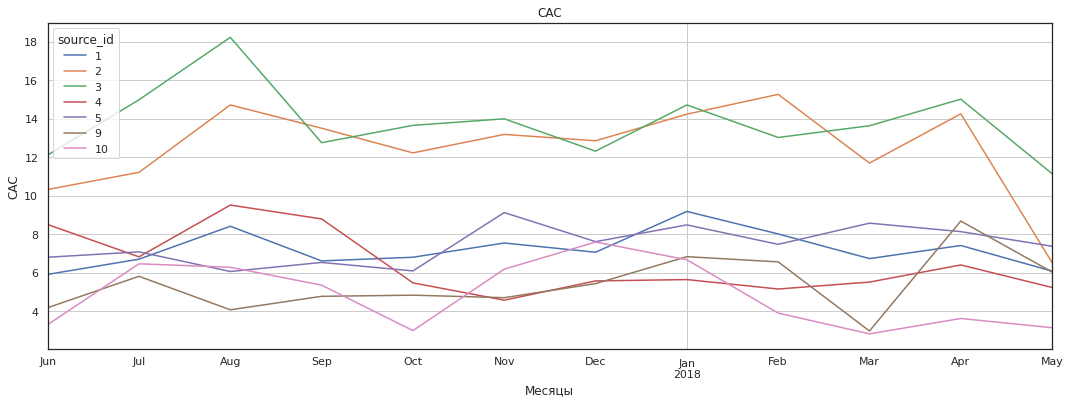

In [441]:
cac_per_month.pivot_table(index='month', columns='source_id', values='cac', aggfunc='sum').plot(grid=True, figsize=(18, 6))
plt.title('CAC')
plt.xlabel('Месяцы')
plt.ylabel('CAC')
plt.show()

<b>Вывод по CAC</b><br>
Средняя стоимость привлечения клиента за весь период равна 9.01. В разбивке по источникам трафика от 4.4 до 13.5. Выделяются два источника 2 и 3 с наибольшей CAC. 

##### Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт.

Определяем для каждого uid первый источник трафика

In [442]:
users = visits.sort_values(by = ['uid','start_ts']).groupby('uid').agg({'source_id':'first'}) 
users.head()

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5


Выделяем источники по которым были расходы

In [443]:
sources = costs['source_id'].unique()
sources

array([ 1,  2,  3,  4,  5,  9, 10])

Выводим ROMI по каждому источнику отдельно для этого делаем цикл

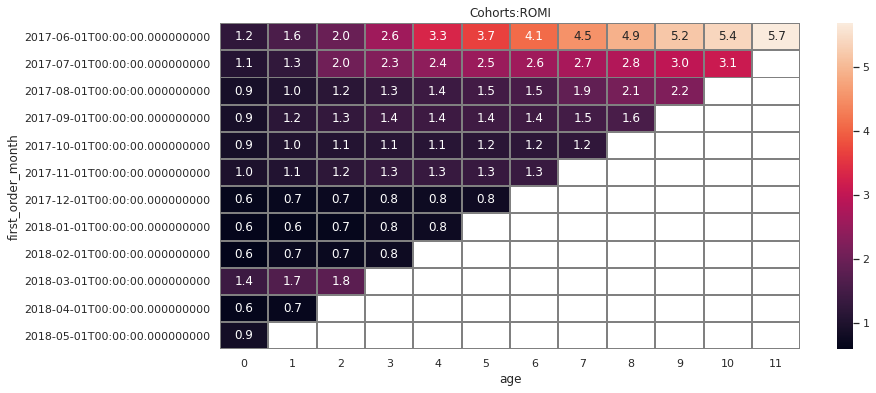

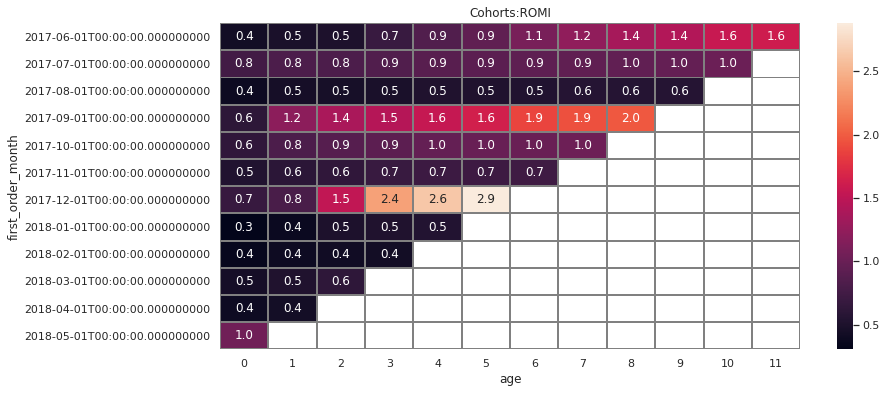

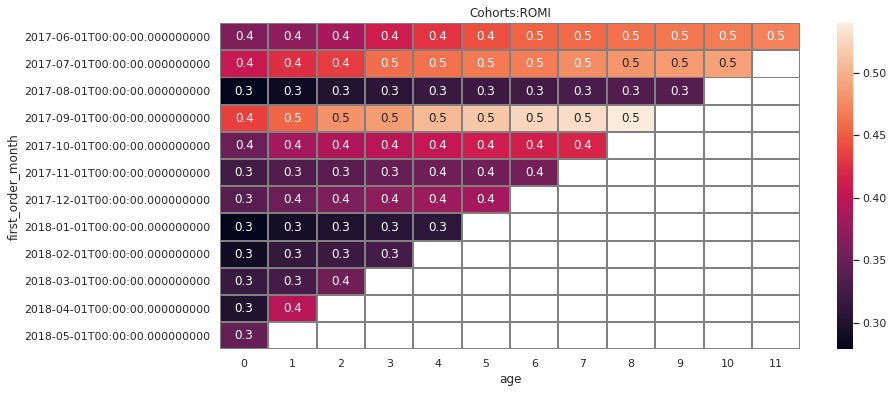

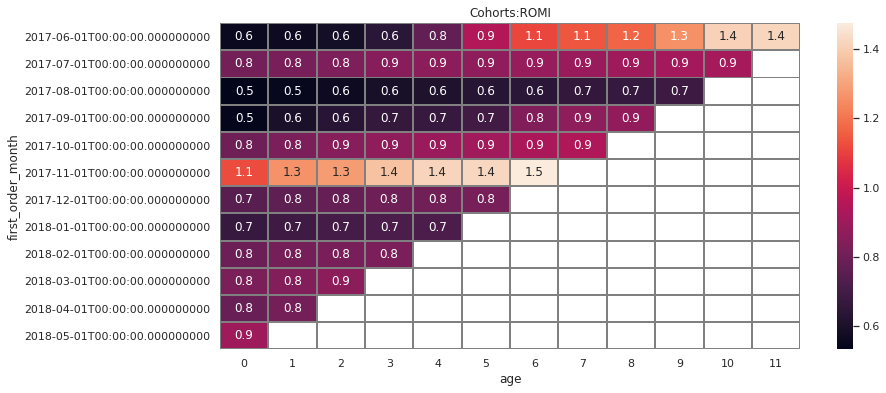

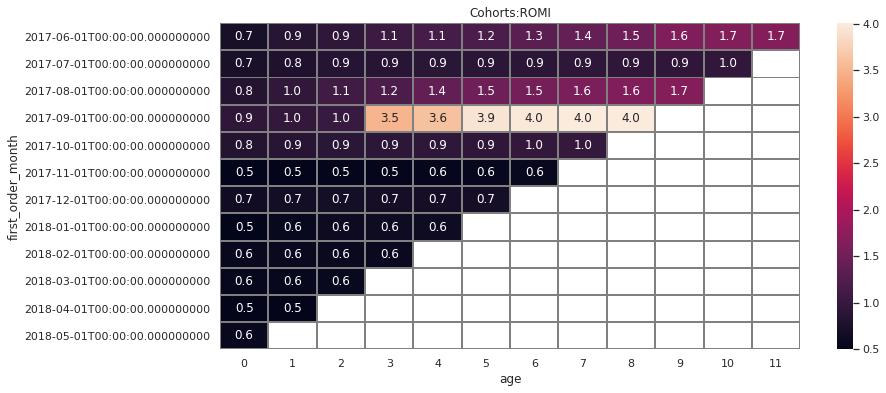

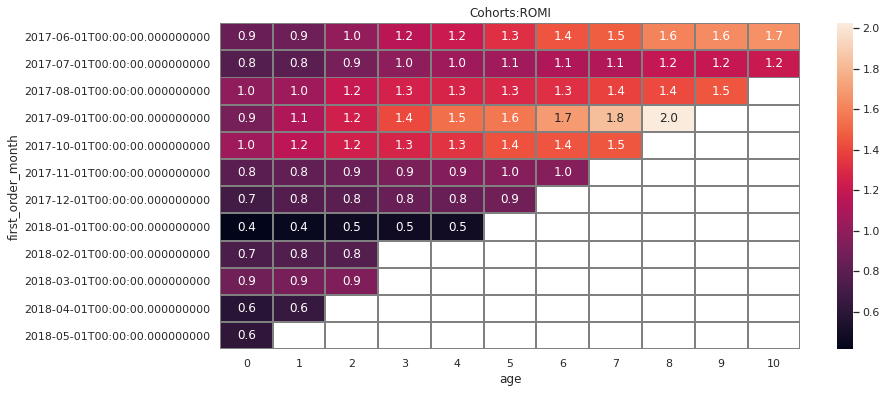

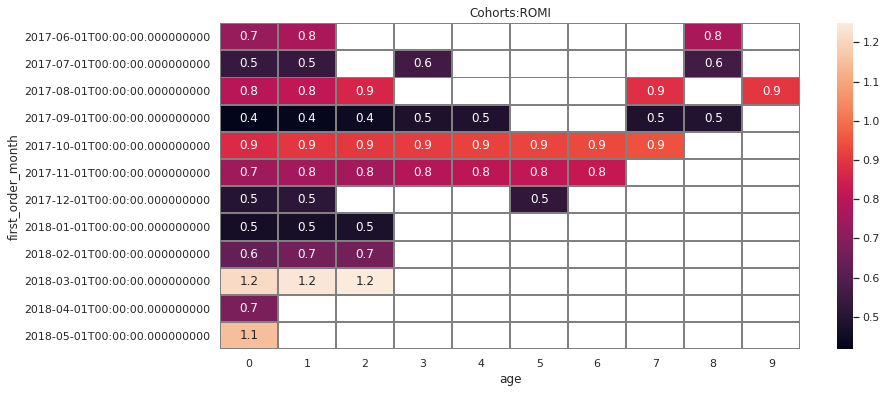

In [444]:
for source in sources:

    source_users = users.query('source_id == @source').index.values #выбираем uid с нужным source_id
    source_orders = orders.query('uid in @source_users') #выбираем orders с нужным uid

    # Определяем размер когорты(кол-во уникальных uid в первом месяце жизни)
    cohort_sizes_for_romi = source_orders.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
    cohort_sizes_for_romi.columns = ['first_order_month','n_buyers']

    # Формируем когорты (месяц первого заказа, месяц заказы, revenue )
    cohorts_for_romi = source_orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum'}).reset_index()

    # Добавляем размер когорты (кол-во покупателей в первый месяц)
    report = pd.merge(cohort_sizes_for_romi, cohorts_for_romi, on='first_order_month')

    # Считаем LTV
    margin_rate = 1 # по условию

    report['gp'] = report['revenue'] * margin_rate #валовая прибыль
    report['age'] = ((report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int') #lifetime
    report['ltv'] = report['gp'] / report['n_buyers']

    output_romi = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean') # переводим в сводную
    output_romi = output_romi.cumsum(axis=1).fillna(0) # считаем ltv накопительным итогом

    # Считаем costs по месяцам
    source_costs = costs.query('source_id ==@source') # выбираем costs для нужного surce_id
    month_costs = source_costs.groupby('month')['costs'].sum().reset_index()

    #Считаем CAC и ROMI
    report_romi = pd.merge(report, month_costs, left_on='first_order_month', right_on='month') # добавили costs к когорам
    report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers'] #CAC
    report_romi['romi'] = report_romi['ltv'] / report_romi['cac'] #ROMI
    
    output_romi_pivot = report_romi.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean') #перводим в свод
    output_romi_pivot = output_romi_pivot.cumsum(axis=1)
    #display(output_romi_pivot)

    #Строим heatmap
    
    sns.set(style='white')
    plt.figure(figsize=(13, 6))
    plt.title('Cohorts:ROMI')
    sns.heatmap(output_romi_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray'); 

<b>Вывод по ROMI</b><br>
Сравним по ROMI на 6 месяц (age 5 на графиках). 
- В первом источнике (source_id = 1) в самой старой когорте (июнь 2017) ROMI высокий (3.7). Но показатель устойчиво снижается с увеличением first_order_month и в декабрьской когорте становится меньше 1 (т.е. уже работаем в убыток)
- По второму источнику(source_id = 2) ROMI по всем когортам ниже 1 кроме стартовавших в сентябре и декабре 2017
- Третий источник (source_id = 3): ROMI во всех когортах ниже 1
- В 4 источнике ROMI также низкий кроме когорты начавшейся в ноябре 2017
- 5 источник: интересная когорта сентября 2017 с ROMI 3.9 (рост с декабря 2017) остальные когорты в основном ниже 1
- 9 источник: ROMI в среднем выше 1 кроме последней когороты от января 2018
- 10 источник: ROMI ниже 1 и данные фрагментарные - мало продаж(?)

### Этап 3. Выводы и рекомендации

#### Источники трафика, требующие внимания.

По итогам анализа посещений сайта Яндекс.Афиши с июня 2017 по май 2018, выгрузки заказов за этот период и рекламных расходов за тот же период выводы следующие:
1. Срочно обратить внимание на три источника трафика с большим потоком покупателей и проблемами с прибыльностью:
    - Источник трафика 3: убыточный канал с ROMI ниже 1, при этом расходы на него максимальные. Маркетинговая активность приводит к значительному росту посещаемости, более того сумма расходов в течении отчетного периода коррелирует с MAU. Однако высокая посещаемость не достаточно эффективно конвертируется в заказы. Кол-во покупателей высокое, но за счет больших расходов CAC также максимальное в этом источнике. Рекомендация: не расходовать деньги на привлечение из этого источника.
    - Источник трафика 4: в целом также убыточный канал продаж. Расходы на аквизицию высокие, но за счет большого числа покупателей CAC низкий. При этом одна когорта начавшаяся в ноябре 2017 имеет ROMI выше 1. Рекомендация: проанализировать прибыльную когороту и более точно таргетировать маркетинговую активность по этому источнику. Второй вариант: не расходовать деньги на привлечение из этого источника.
    - Источник трафика 5: ROMI ниже 1 в половине когорт, при этом есть интересная когорта от сентября 2017 с ROMI 3.9. Рекомендация: проанализировать прибыльную когороту и более точно таргетировать маркетинговую активность по этому источнику.
2. Источники трафика которые по которым также желательно откорректировать маркетинг:
    - Источник 9: В целом прибыльный, ROMI в среднем выше 1 кроме последней когороты от января 2018. Расходы низкие, CAC низкий. Кол-во покупателей также низкое. Рекомендация: имеет смысл увеличить активность по этому источнику
    - Источник 1: Высокий ROMI в когортах начавшихся в июне-июле 2017.При расходы на аквизицию низкие относительно других источников. Но ROMI устойчиво снижался в последующих когортах  и достиг уровня ниже 1 в когорте от декабря 2017. Так как CAC сильно не росли, то причина в снижение LTV. Рекомендации: проанализировать что поменялось в клиентах в этом источнике и возможно прекратить расходовать на него деньги. 
    - Источник 2: две когороты (стартовавшие в сентябре и декабре 2017) показывают неплохой ROMI, остальный - плохой. Также стоимость аквизиции (CAC) в этом канале высокая. Рекомендации: выяснить кого мы привлекли в эти прибыльные когорты и ставить целью именно эти целевые группы. Расходы сократить за счет таргетирования.
    - Источник 10: ROMI ниже 1 и данные фрагментарные - мало продаж(?). Рекомендации: не тратить ресурсы на этот источник

#### Выводы после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции.

1. Маркетинговые
    - Всего за период потратили 329 тысяч. Месячные траты росли во второй половине 2017 года и снижались в первой половине 2018. В разбивке по источникам трафика видно что больше всего тратили на источник 3 и именно его изменение определяет общую динамику расходов. Изменение в уровне расходах отражалось на MAU, графики практически совпадают.
    - Средняя стоимость привлечения клиента за весь период равна 9.01. В разбивке по источникам трафика от 4.4 до 13.5. Выделяются два источника 2 и 3 с наибольшей CAC.
    - По источникам трафика: больше всего израсходовали на источник 3, не очень эффективно. Вторые по расходам источники 4, 5, также требуют коррекции. Минимальные расходы на источники 9 и 10. Источник 9 прибыльный, расходы на него можно увеличить.
<br>
2. Продуктовые:
    - Выявлены тренды: рост недельного и месячного кол-ва уникальных пользователей с начала осени до декабря 2017. В декабре 2017 началось плавное снижение до конца отчетного периода. В целом сравнив конец с началом периода можно предположить что число  уникальных пользователей имеет тенденцию к росту. Причины: маркетинговая активность, хотя нельзя исключать и сезонность или внешиен факторы. 
    - Выявлены аномально высокие и низкие показатели DAU. Возможные причины: активность Яндекс Афишы; внешнее событие; ошибка в данных. Аномальное падение возможно из-за внутренней технической ошибки или внешних причин ограничивающих доступ к сайту.
    - Среднее число посещений: 1.1 .Выявлено аномально высокое число посещений на одного пользователя 24 и 28 ноября 2017 (24 также было высокое DAU) и аномально низкая активность 31.03.2018, что совпадает с минимальным DAU. Причины очевидно такие же как и для выбросов в DAU: Яндекс Афиша что-то сделала для привлечения пользователей включая повторные визиты; внешняя причина: случилось событие которое как-то привело пользователей на страницу; ошибка в данных. Аномальное падение 31.03.2018 возможно из-за внутренней технической ошибки или внешних причин ограничивающих доступ к сайту.
    - Типичная продолжительности сессии (по моде) крайне небольшая: 60 секунд.
     - Retention rate низкий (хотя тут нужно сравнивать с аналогичными продуктами - может и нормальный) и в целом имеет тенденцию к снижению с ростом времени жизни когорты (что в принципе нормально)
<br>
3. Метрики электронной коммерции
    - Среднее время между первым посещением сайта и первой покупкой составляет 16 дней, однако распределение ненормальное и минимум 50% процентов заказов (медиана) совершается в день первого посещения.
    - Среднее количество покупок на одного покупателя за 6 месяцев: 1.24
    - Средний чек за весь период равен 5. При оценке по месяцам видны колебания с минимальными значениями в июне 2017 и январе 2018. Максимальный средний чек был в декабре 2017.
    - Средний LTV за 6 месяцев по когортам с lifetime не моложе 5 месяцев 7.97. При оценке по месяцам видно что основную ценность клиент создает в первый месяц, а в дальнейшие месяцы прирост LTV небольшой. При этом разные когорты немного отличаются по LTV. Выделяется когорта начавшаяся в сентябре 2017: максимальное LTV за 6 мес за счет большого прироста в декабре 2017.

####  Итоги когортного анализа. Перспективные для компании когорты клиентов.


Прибыльные когорты, в которых нужно удержать или повысить retention

 - источник_трафика 4, дата начала: ноябрь 2017
 - источник 5, сентябрь 2017
 - источник 9, все даты
 - источник 1, июнь-июль 2017
 - источник 2, сентябре 2017 и декабре 2017 